# INTRODUCTION

In this fourth notebook, the focus is entirely on K-medoids clustering. For a comprehensive understanding of the model, it is recommended to review the previous notebooks on [EDA](https://www.kaggle.com/code/tarktunataalt/eda-of-global-prosperity-2023-insights), [PCA](https://www.kaggle.com/code/tarktunataalt/global-prosperity-pca-distance-insights), and [K-Means Clustering](https://www.kaggle.com/code/tarktunataalt/k-means-clustering-global-prosperity-2023).

The EDA notebook includes various visualizations that provide an overview of the dataset, such as:
- Boxplots for understanding the distribution of each variable.
- Correlation heatmaps to examine relationships between variables.
- Histograms and density plots for individual variable analysis.

In the PCA notebook, PCA was applied to the scaled data, revealing that the scaled data provided the best clustering. The Euclidean distance was chosen as the appropriate distance metric due to its effectiveness in capturing the data's structure.

For the PCA and subsequent analyses, the 'Country' variable was set as the index, and the 'AverageScore' was excluded as it represents a summary measure of the other variables.

In this notebook, K-medoids clustering is explored, building on the insights gained from the EDA, PCA, and K-means analyses. The primary goal is to identify meaningful clusters within the dataset and interpret the underlying patterns.

Additionally, it should be noted that the `factoextra` library does not run directly on Kaggle. Hence, the code was executed locally, and the results were uploaded to Kaggle. It is recommended to download the notebook and run it locally for similar analyses.

- **[EDA Notebook](https://www.kaggle.com/code/tarktunataalt/eda-of-global-prosperity-2023-insights):** For a comprehensive overview of the dataset and its key features.
- **[PCA Notebook](https://www.kaggle.com/code/tarktunataalt/global-prosperity-pca-distance-insights):** To understand the application of PCA and the selection of the distance metric.
- **[K-Means Clustering Notebook](https://www.kaggle.com/code/tarktunataalt/k-means-clustering-global-prosperity-2023):** To see the application of K-means clustering on the dataset.


In [1]:
library(factoextra)
library(dplyr)
library(tibble)
library(gridExtra)
library(rnaturalearth)
library(rnaturalearthdata)
library(ggplot2)
library(sf)
library(stringr)
library(cluster)

data=read.csv("/kaggle/input/2023-global-country-development-and-prosperity-index/data.csv")
data <- data %>%
  column_to_rownames(var = "Country")
data=data[,2:13]
scaled_pca_data <- prcomp(data, center = TRUE, scale. = TRUE)
scaled_pca_data <- scaled_pca_data$x[,1:2]

Zorunlu paket yükleniyor: ggplot2



Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa





Attaching package: ‘dplyr’





The following objects are masked from ‘package:stats’:



    filter, lag





The following objects are masked from ‘package:base’:



    intersect, setdiff, setequal, union







Attaching package: ‘gridExtra’





The following object is masked from ‘package:dplyr’:



    combine







Attaching package: ‘rnaturalearthdata’





The following object is masked from ‘package:rnaturalearth’:



    countries110





Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE




# OPTIMAL NUMBER OF CLUSTERS FOR K-MEDOIDS

## Elbow Method


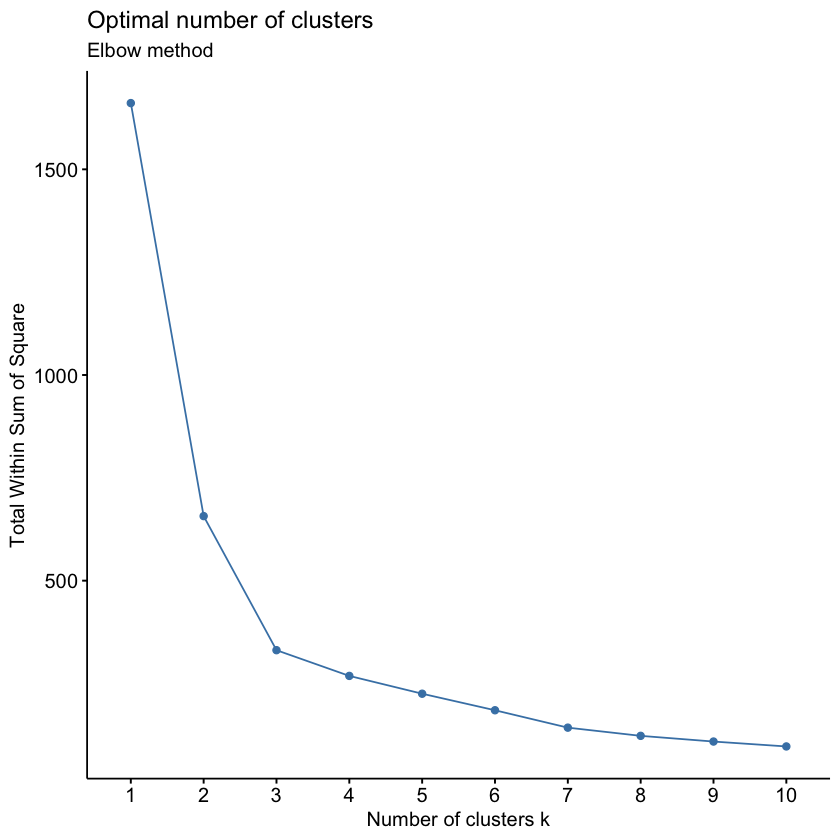

In [2]:
fviz_nbclust(scaled_pca_data,pam,method = "wss",nstart = 25)+
  labs(subtitle = "Elbow method")

The Elbow Method suggests the optimal number of clusters based on the Total Within Sum of Square (WSS). As seen in the plot, there is a clear 'elbow' at k = 3, indicating that this is a good choice for the number of clusters. After k = 3, the rate of decrease in WSS slows down, suggesting that adding more clusters does not significantly improve the model.

## Silhouette Method

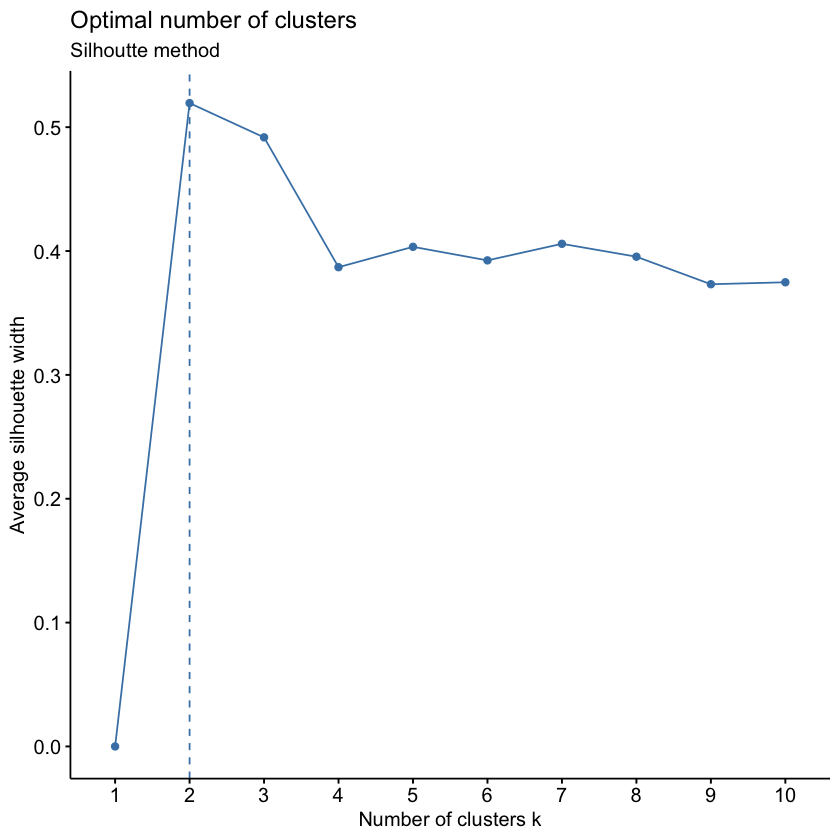

In [3]:
fviz_nbclust(scaled_pca_data,pam,method = "silhouette")+ #for average silhouette width
  labs(subtitle = "Silhoutte method")

The Silhouette Method measures how similar an object is to its own cluster compared to other clusters. The plot shows the highest silhouette width at k = 2. However, considering that the silhouette method is generally conservative and often suggests fewer clusters, it is worth exploring k = 3 and k = 7 as alternatives. This approach balances between compact and well-separated clusters


## Gap Statistic Method

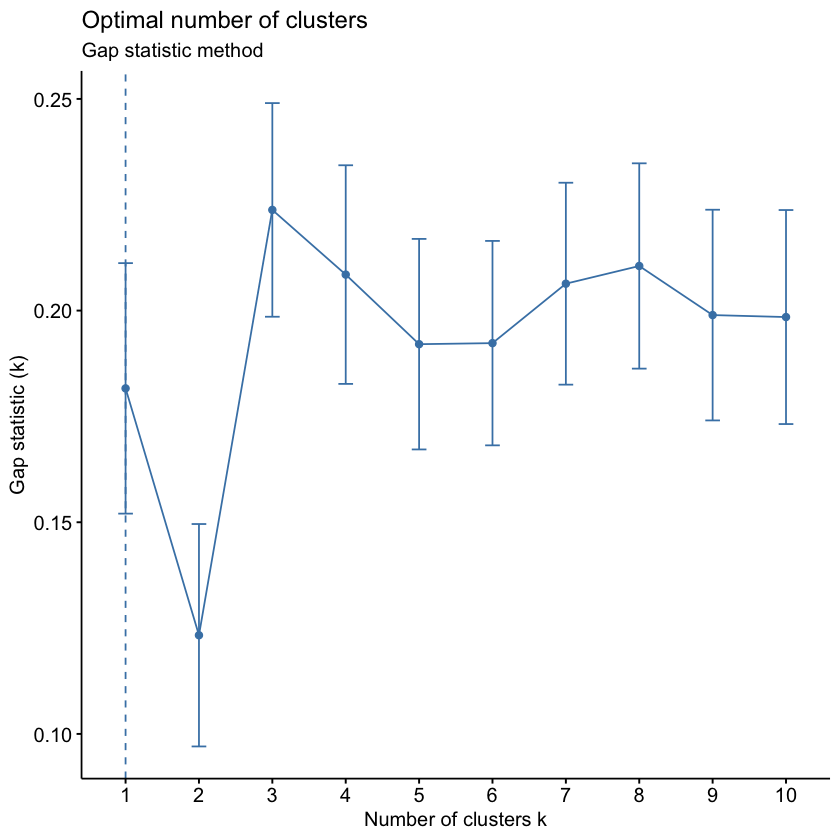

In [4]:
fviz_nbclust(scaled_pca_data, pam, nstart = 25,  method = "gap_stat", nboot = 500)+
  labs(subtitle = "Gap statistic method") 

The Gap Statistic Method compares the total within intra-cluster variation for different numbers of clusters with their expected values under null reference distribution of the data. The plot suggests k = 3 as the optimal number of clusters. However, considering the overall performance, k = 4, k = 7, and k = 8 also emerge as strong candidates for the number of clusters.



## General Conclusion



Based on the three methods used for determining the optimal number of clusters, k = 3 is consistently suggested as a strong choice. The Elbow Method clearly indicates an elbow at k = 3, while the Silhouette and Gap Statistic methods also suggest k = 4, k = 7, and k = 8 could be explored. Therefore, for a balanced approach, it is recommended to proceed with k = 3 for the primary analysis and consider k = 7 as an alternative for further exploration, as it is suggested by two of the three methods.

# K-MEDOIDS

## FOR 3 CLUSTERS

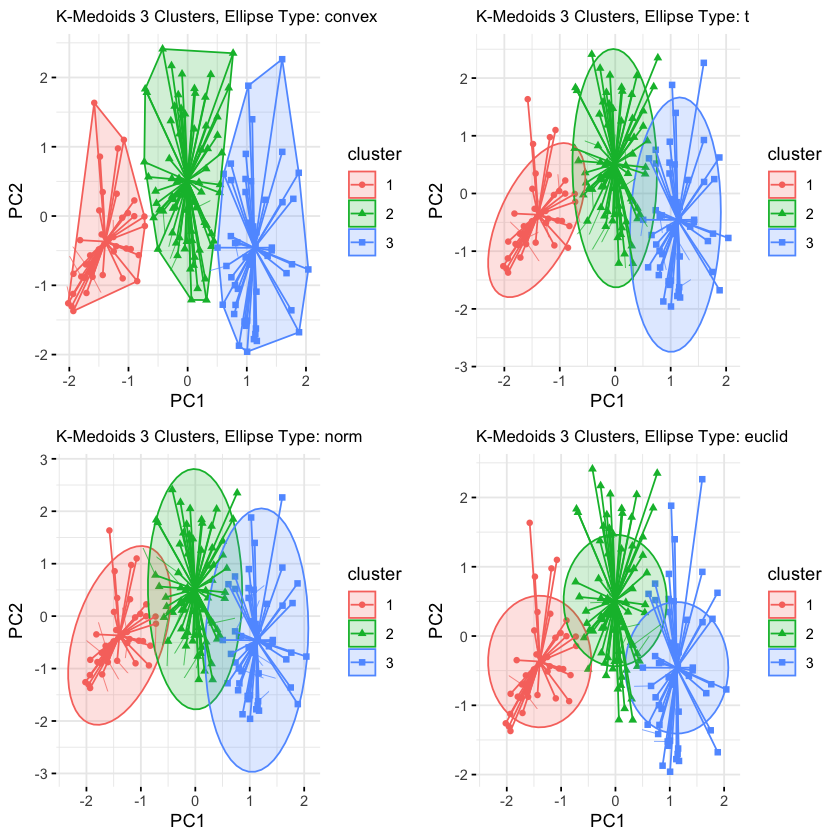

In [5]:
pam_res_3 <- pam(scaled_pca_data, 3, nstart=25) 
ellipse_types <- c("convex", "t", "norm", "euclid")
k_3plots <- list()

for (etype in ellipse_types) {
  p <- fviz_cluster(pam_res_3, data = scaled_pca_data,
                    ellipse.type = etype, 
                    star.plot = TRUE, 
                    repel = TRUE, 
                    labelsize = 0, 
                    ggtheme = theme_minimal()
  ) + labs(title = paste("K-Medoids 3 Clusters, Ellipse Type:", etype)) +
      theme(plot.title = element_text(size = 10))
  k_3plots[[etype]] <- p
}

grid.arrange(grobs = k_3plots, ncol = 2)

The visualization of K-Medoids clustering with 3 clusters using different ellipse types shows the general distribution and separation of the clusters. Each plot, whether using convex, t, norm, or Euclid ellipses, demonstrates that while clusters are forming, there is some degree of overlap between them.

The convex ellipse type offers the most distinct representation of the clusters, even though overlaps are still present. This indicates that while the clustering captures significant patterns in the data, some similarities between clusters persist. Overall, the clusters are reasonably well-formed, and the visualizations provide a clear understanding of their distribution.

In conclusion, the clustering shows meaningful separation, and the convex ellipse type provides a particularly clear view of the cluster boundaries. Further analysis and refinement could improve the distinctness of the clusters, but the current results suggest that three clusters are a reasonable choice for this dataset.

## FOR 7 CLUSTERS

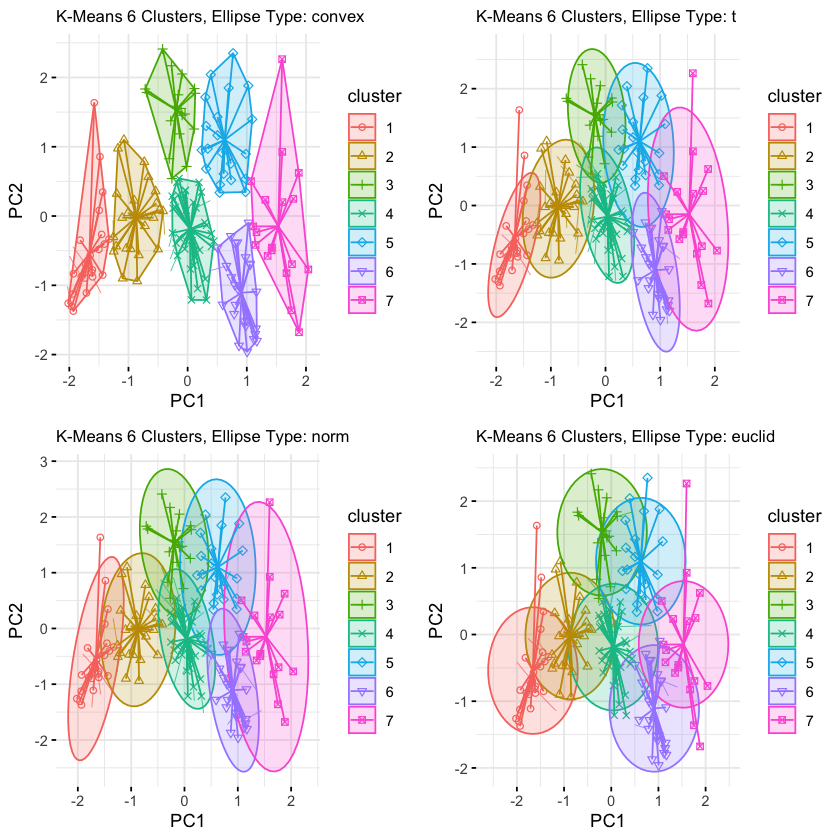

In [6]:
pam_res_7 <- pam(scaled_pca_data, 7, nstart=25) 
ellipse_types <- c("convex", "t", "norm", "euclid")
k_7plots <- list()

for (etype in ellipse_types) {
  p <- fviz_cluster(pam_res_7, data = scaled_pca_data,
                    ellipse.type = etype, 
                    star.plot = TRUE, 
                    repel = TRUE, 
                    labelsize = 0, 
                    ggtheme = theme_minimal()
  ) + labs(title = paste("K-Means 6 Clusters, Ellipse Type:", etype)) +
      theme(plot.title = element_text(size = 10))
  k_7plots[[etype]] <- p
}

grid.arrange(grobs = k_7plots, ncol = 2)

The visualization of K-Medoids clustering with 7 clusters using various ellipse types—convex, t, norm, and Euclid—illustrates a more complex distribution and less distinct separation compared to the 3-cluster scenario. The increased number of clusters results in greater overlap among them, making it challenging to clearly differentiate each cluster.

The convex ellipse type, while providing a more distinct representation, still shows significant overlap. This indicates that while the clustering algorithm identifies distinct groupings, the data's inherent similarities lead to blurred boundaries between some clusters.

Overall, the clusters are not as distinctly separated, suggesting that 7 clusters may introduce more complexity than clarity. However, the results still provide valuable insights into the data's structure, highlighting areas where clusters are more densely packed or significantly overlapping. Further refinement and analysis might be necessary to achieve clearer separation, but the current visualization suggests that fewer clusters might offer more distinct groupings.

# CONCLUSION

The analysis indicated that 3 clusters were optimal based on the Elbow, Silhouette, and Gap statistic methods. The evaluation of the clusters was performed using the K-Medoids algorithm on the PCA-transformed data. The graphical representation of the clusters shows that, while 3 clusters were formed, the separation was less distinct compared to K-Medoids, particularly in the middle and right clusters. This suggests that K-Medoids may provide better differentiation between clusters in this dataset.


In [7]:
summary(data)
aggregate(data, by=list(pam_res_3$cluster), mean)  
aggregate(data, by=list(pam_res_3$cluster), sd)


 SafetySecurity  PersonelFreedom   Governance    SocialCapital  
 Min.   :16.54   Min.   :16.16   Min.   :13.09   Min.   :23.01  
 1st Qu.:59.29   1st Qu.:39.65   1st Qu.:37.47   1st Qu.:47.82  
 Median :68.93   Median :57.17   Median :47.51   Median :54.39  
 Mean   :67.24   Mean   :56.83   Mean   :50.36   Mean   :54.47  
 3rd Qu.:80.56   3rd Qu.:72.86   3rd Qu.:60.97   3rd Qu.:60.61  
 Max.   :96.32   Max.   :94.10   Max.   :90.41   Max.   :82.56  
 InvestmentEnvironment EnterpriseConditions MarketAccessInfrastructure
 Min.   :21.69         Min.   :20.50        Min.   :24.23             
 1st Qu.:40.77         1st Qu.:45.83        1st Qu.:40.05             
 Median :51.25         Median :53.52        Median :56.59             
 Mean   :53.01         Mean   :54.79        Mean   :55.02             
 3rd Qu.:64.64         3rd Qu.:62.76        3rd Qu.:69.06             
 Max.   :84.99         Max.   :83.84        Max.   :85.75             
 EconomicQuality LivingConditions     Health    

Group.1,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,86.53756,81.35561,75.81317,64.91220,75.51244,71.41512,74.76610,68.55951,91.77683,79.96390,82.05415,67.13561
2,67.40093,52.56680,47.11827,54.31587,52.83227,53.61840,57.03173,51.21800,74.00600,71.62253,61.77600,53.73987
3,51.49784,43.38078,34.66588,46.29549,35.19314,43.15314,36.18627,38.42510,45.95784,55.10098,35.47941,51.13039


Group.1,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6.951019,9.507296,9.357966,9.256692,7.484437,7.874884,4.925082,7.350090,2.889432,3.030424,4.766813,6.309125
2,10.629060,16.259852,8.301517,7.080571,8.143655,7.485651,7.829128,8.415800,9.506032,4.883112,10.094142,6.539619
3,16.050990,12.169416,8.681591,7.438780,6.982263,7.146417,6.019378,6.120248,12.350807,8.115166,10.262894,6.641015


* **Cluster 1 - Developed Nations**:
This cluster is characterized by high average scores in most dimensions, indicating well-developed and prosperous countries. Safety and security, personal freedom, and governance scores are significantly higher, reflecting stable and free societies with effective governance structures. Economic quality, living conditions, and education are also high, suggesting a high standard of living and strong educational systems. The lower standard deviation values indicate that countries in this cluster are more homogenous, with similar high scores across various dimensions. This cluster can be named "Developed Nations," as it includes countries that are leaders in multiple areas of prosperity.

* **Cluster 2- Developing Nations**:
This cluster includes countries with moderate scores across most dimensions. The average scores for safety and security, personal freedom, and governance are balanced, indicating a transitional state of development. Economic quality and living conditions are relatively strong, suggesting a decent standard of living and economic environment. The standard deviation values suggest moderate variability within this cluster, with countries having consistent scores across different dimensions. This cluster can be named "Developing Nations," representing countries that are progressing towards higher levels of prosperity but still face significant challenges.

* **Cluster 3 - Underdeveloped Nations**:
Countries in this cluster exhibit lower scores across most dimensions compared to Cluster 1. The average scores for safety and security, governance, and economic quality are notably lower, reflecting substantial challenges in these areas. Personal freedom and social capital are also lower, indicating issues related to individual liberties and societal trust. The higher standard deviation values in this cluster indicate greater variability among countries, highlighting significant differences within the group. This cluster can be referred to as "Underdeveloped Nations," as it comprises countries that are still working towards improving their overall prosperity.

Overall, the clustering analysis suggests that 3 clusters effectively capture the differences in global prosperity among countries. These clusters align with the classic literature categorization of countries into underdeveloped, developing, and developed nations. This natural separation within the data confirms that the traditional distinctions are grounded in the actual metrics of prosperity and development. The analysis reinforces the validity of these categories by showing that the differences in dimensions such as safety and security, governance, and economic quality are significant enough to group countries naturally into these three well-defined clusters.

In comparison to K-Means, the K-Medoids algorithm provides a slightly different perspective. While the clusters are similarly defined, the separation is less distinct, especially in the middle and right clusters. This indicates that K-Means may offer better differentiation between clusters in this dataset, particularly in capturing the nuances within the developing and developed nations. Nonetheless, K-Medoids clustering still supports the general categorization of countries into underdeveloped, developing, and developed nations, affirming the robustness of this classification.


# K-MEDOIDS CLUSTERING RESULTS ON WORLD MAP

In [8]:
data=read.csv("/kaggle/input/2023-global-country-development-and-prosperity-index/data.csv")

world <- ne_countries(scale = "medium", returnclass = "sf")

data$Country <- str_trim(data$Country)

data$Cluster <- pam_res_3$clustering

data <- data %>%
  mutate(Country = case_when(
    Country == "United States" ~ "United States of America",
    Country == "Korea" ~ "South Korea",
    Country == "North Korea" ~ "Dem. Rep. Korea",
    Country == "Ivory Coast" ~ "Côte d'Ivoire",
    Country == "Czech Republic" ~ "Czechia",
    Country == "Dominican Republic" ~ "Dominican Rep.",
    Country == "Bosnia and Herzegovina" ~ "Bosnia and Herz.",
    Country == "Cape Verde" ~ "Cabo Verde",
    Country == "São Tomé and Príncipe" ~ "São Tomé and Principe",
    Country == "Equatorial Guinea" ~ "Eq. Guinea",
    Country == "Swaziland" ~ "eSwatini",
    Country == "Democratic Republic of Congo" ~ "Dem. Rep. Congo",
    Country == "Central African Republic" ~ "Central African Rep.",
    Country == "South Sudan" ~ "S. Sudan",
    Country == "Lao PDR" ~ "Laos",
    Country == "Macedonia" ~ "North Macedonia",
    Country == "Syrian Arab Republic" ~ "Syria",
    TRUE ~ Country
  ))

data$Cluster <- factor(data$Cluster, levels = c("3", "2", "1"), labels = c("Underdeveloped", "Developing", "Developed"))

world_data <- left_join(world, data, by = c("name" = "Country"))

cluster_colors <- c("Underdeveloped" = "red", "Developing" = "green", "Developed" = "purple")


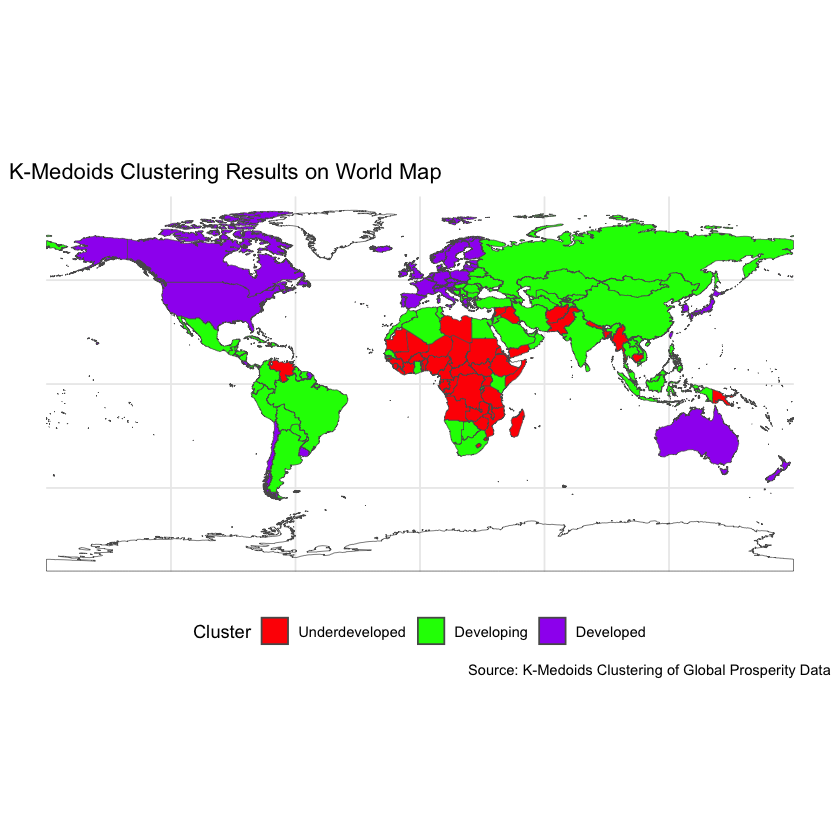

In [9]:
ggplot(data = world_data) +
  geom_sf(aes(fill = Cluster)) +
  scale_fill_manual(values = cluster_colors, name = "Cluster", na.translate = FALSE) +
  theme_minimal() +
  labs(title = "K-Medoids Clustering Results on World Map",
       caption = "Source: K-Medoids Clustering of Global Prosperity Data") +
  theme(legend.position = "bottom")

The map highlights the clustering results of the K-Medoids algorithm applied to the Global Prosperity Data:

- **Developed (Purple)**: These regions include North America, Western Europe, and parts of Oceania, reflecting high prosperity and well-being.
- **Developing (Green)**: Central and South America, parts of Eastern Europe, and much of Asia fall into this category, showing moderate levels of prosperity.
- **Underdeveloped (Red)**: Most of Africa and parts of South Asia are classified here, indicating lower levels of prosperity and development.

The clustering results align with the average scores presented in the [EDA notebook](https://www.kaggle.com/code/tarktunataalt/eda-of-global-prosperity-2023-insights) and are similar to those obtained using the K-Means algorithm in the [K-Means Clustering notebook](https://www.kaggle.com/code/tarktunataalt/k-means-clustering-global-prosperity-2023/notebook). Developed regions correspond to higher average scores, while underdeveloped regions have lower scores. This consistency across different clustering methods reinforces the validity of the approach.
